In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, spearmanr

In [98]:
df = pd.read_csv('../data/Датасет.csv')
df = df.set_index('Наименование')
df.columns = pd.to_datetime(df.columns, dayfirst=True)
df = df.dropna()
df.sample(2)

,2022-01-10,2022-01-14,2022-01-21,2022-01-28,2022-02-04,2022-02-11,2022-02-18,2022-02-25,2022-03-04,2022-03-11,...,2025-04-28,2025-05-05,2025-05-12,2025-05-19,2025-05-26,2025-06-02,2025-06-09,2025-06-16,2025-06-23,2025-06-30
Наименование,,,,,,,,,,,,,,,,,,,,,
"Смартфон, шт.",11393.77,11494.52,11529.64,11597.33,11644.36,11612.93,11581.96,12024.71,13183.31,14041.77,...,17043.54,16813.59,16770.96,16945.82,16758.45,16921.19,16960.41,16875.56,16650.91,16473.41
"Морковь, кг",47.01,47.36,48.15,48.65,49.20,50.15,51.05,51.66,52.99,54.79,...,55.95,57.89,60.51,63.05,66.40,69.42,71.45,73.14,75.49,77.42


In [99]:
#создадим датасет с темпами прироста цен 2022, 2023, 2024, 2022-2025

columns_2022 = [col for col in df.columns if col.year == 2022]
columns_2023 = [col for col in df.columns if col.year == 2023]
columns_2024 = [col for col in df.columns if col.year == 2024]
columns_2025 = [col for col in df.columns if col.year == 2025]

growth_rate = pd.DataFrame()

growth_rate['2022'] = (df[max(columns_2022)] - df[min(columns_2022)])/ df[min(columns_2022)]*100
growth_rate['2023'] = (df[max(columns_2023)] - df[min(columns_2023)])/ df[min(columns_2023)]*100
growth_rate['2024'] = (df[max(columns_2024)] - df[min(columns_2024)])/ df[min(columns_2024)]*100
growth_rate['2022-2025'] = (df[max(columns_2025)] - df[min(columns_2022)])/ df[min(columns_2022)]*100

growth_rate.sample(2)

,2022,2023,2024,2022-2025
Наименование,,,,
"Хлеб и булочные изделия из пшеничной муки различных сортов, кг",10.504474,6.638468,15.233522,44.494877
"Футболка детская, шт.",15.961339,6.154513,10.269192,37.143867


In [100]:
#Найдем топ-5 подорожавших товаров и топ-5 товаров с наименьшим приростом
top5_exp = list(growth_rate['2022-2025'].sort_values()[-5:].index)
top5_ch = list(growth_rate['2022-2025'].sort_values()[:5].index)
print(f"Топ 5 подорожавших товаров: {'; '.join(top5_exp)}\nТоп-5 товаров с наименьшим приростом: {'; '.join(top5_ch)}")

Топ 5 подорожавших товаров: Бананы, кг; Спички, коробок; Картофель, кг; Свёкла столовая, кг; Лук репчатый, кг
Топ-5 товаров с наименьшим приростом: Крупа гречневая-ядрица, кг; Огурцы свежие, кг; Плиты древесностружечные, ориентированно-стружечные, м2; Телевизор, шт.; Яйца куриные, 10 шт.


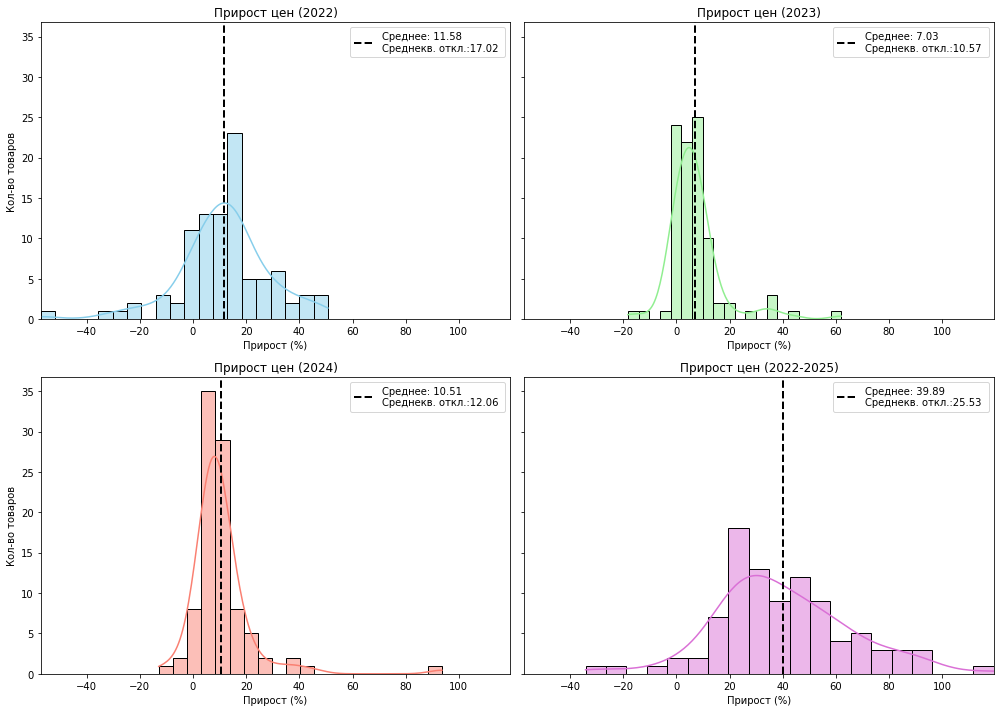

In [101]:
#Посмотрим, как выглядит распределение прироста цен за разные года
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)

years = ['2022', '2023', '2024', '2022-2025']
colors = ['skyblue', 'lightgreen', 'salmon', 'orchid']

axes = axes.flatten()

all_data = pd.concat([growth_rate[year] for year in years])
x_min, x_max = all_data.min(), all_data.max()

for i, year in enumerate(years):
    sns.histplot(growth_rate[year], kde=True, bins=20, color=colors[i], ax=axes[i])

    mean_value = growth_rate[year].mean()
    st_dev = growth_rate[year].std()

    axes[i].axvline(mean_value, color='black', linestyle='--', linewidth=2, label=f'Среднее: {mean_value:.2f}\nСреднекв. откл.:{st_dev:.2f} ')
    axes[i].legend() 

    axes[i].set_xlim(x_min, x_max)
    axes[i].set_title(f'Прирост цен ({year})', fontsize=12)
    axes[i].set_xlabel('Прирост (%)')

    if i % 2 == 0:
        axes[i].set_ylabel('Кол-во товаров')
    else:
        axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


Проинтерпретируем полученные графики: <br> 1. **2022**: гистограмма распределения практически симметрична, длинный левый хвост (есть товары, которые довольно сильно подешевели), правый хвост короче, но высота столбцов выше (много сильно подорожавших товаров, однако прирост цен имеет не такой большой диапазон) ; <br> 2. **2023**: гистограмма более узкая, в среднем прирост цен ниже, чем в прошлом году. Левый хвост стал короче;<br> 3. **2024**: гистограмма стала чуть шире, хвосты остались примерно теми же, за исключением пары товаров с экстремальным приростом; <br> 4. **Совокупный прирост:** распределение смещено влево, правый хвост достаточно длинный (часть товаров существенно подорожало)


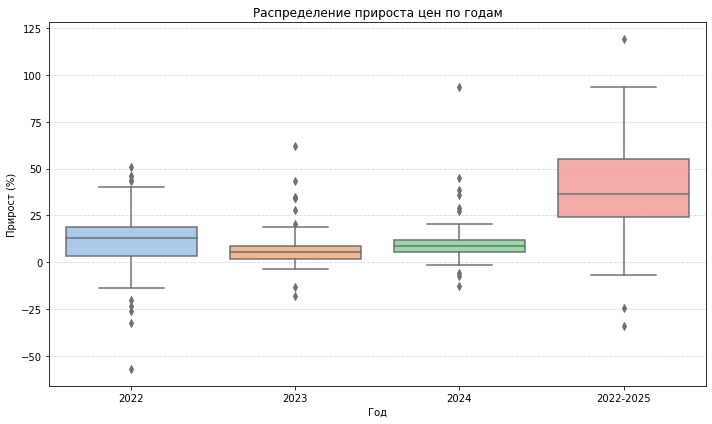

In [102]:
#Посмотрим также на ящики с усами
growth_melted = growth_rate.melt(var_name='Год', value_name='Прирост (%)')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Год', y='Прирост (%)', data=growth_melted, palette='pastel')
plt.title('Распределение прироста цен по годам')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Проинтерпретируем полученные графики: <br> 1. **2022:** Ящик самый большой из сета 2022-2024, что говорит о большем разбросе прироста цен. Медианное значение также выше, приросты в среднем выше. Длинные усы, больше выбросов в "нижней" границе; <br> 2. **2023:** Ящик уже, разброс ниже, что также было видно и на гистограмме. "Верхний ус" больше, в том же направлении больше выбросов <br> 3. **2024:** Картина схожая с графиком прошлого года, однако медиана чуть больше <br> 4. **2022-2025:** Широкий ящик, небольшое количество выбросов. 

In [103]:
#Функция, которая находит выбросы
def find_outliers (data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data < lower_bound) | (data > upper_bound)].sort_values()
    return outliers
find_outliers(growth_rate['2022']).index

Index(['Капуста белокочанная свежая, кг', 'Картофель, кг',
       'Свёкла столовая, кг',
       'Плиты древесностружечные, ориентированно-стружечные, м2',
       'Морковь, кг', 'Легковой автомобиль иностранной марки новый, шт.',
       'Мыло туалетное, 100 г', 'Прокладки женские гигиенические, 10 шт.',
       'Мыло хозяйственное, 200 г', 'Спички, коробок'],
      dtype='object', name='Наименование')

In [104]:
#Посмотрим на датафрейм с выбросами
def find_outliers_df(growth_rate):
    outlier_records = []

    for year in ['2022', '2023', '2024', '2022-2025']:
        series = growth_rate[year]
        outliers = find_outliers(series)

        for index, value in outliers.items():
            outlier_records.append({
                'Товар': index,
                'Год': year,
                'Прирост (%)': value
            })

    outliers_df = pd.DataFrame(outlier_records)
    outliers_df = outliers_df.set_index('Товар')
    return outliers_df
outliers = find_outliers_df(growth_rate)
outliers.sample(5).sort_values('Год')

,Год,Прирост (%)
Товар,,
"Прокладки женские гигиенические, 10 шт.",2022,46.051399
"Спички, коробок",2022,50.746269
"Крупа гречневая-ядрица, кг",2023,-18.258688
"Помидоры свежие, кг",2023,34.323213
"Смартфон, шт.",2024,-7.345957


In [105]:
#Узнаем количество выбросов в каждом году
q_outliers = []
for year in years:
    q_outliers.append(find_outliers(growth_rate[year]).nunique())
outliers_summary = pd.DataFrame({
    'Год': years,
    'Количество выбросов': q_outliers
})
outliers_summary

,Год,Количество выбросов
0,2022,10
1,2023,9
2,2024,9
3,2022-2025,3


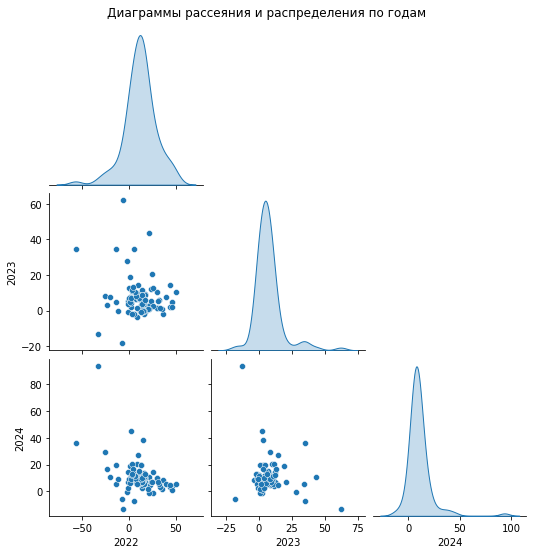

In [ ]:
#построим диаграмму рассеивания для 2022, 2023 и 2024 годов. Посмотрим, имеется ли какая-нибудь связь между приростами цен
sns.pairplot(growth_rate[years[:-1]], kind='scatter', diag_kind='kde', corner=True)
plt.suptitle('Диаграммы рассеяния и распределения по годам', y=1.02)
plt.show()

Проинтерпретировать

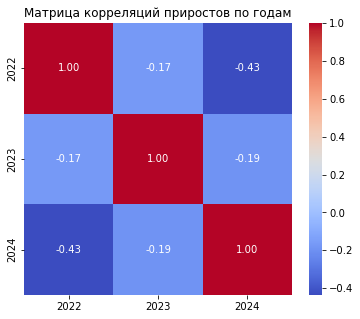

In [107]:
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций приростов по годам')
plt.show()

Проинтерпретировать. Сказать, что 0.43 еще ни о чем не говорит

In [ ]:
x = growth_rate['2022']
y = growth_rate['2023']

r_pearson, p_pearson = pearsonr(x, y)

r_spearman, p_spearman = spearmanr(x, y)

print(f"Pearson: r = {r_pearson:.3f}, p = {p_pearson:.3g}")
print(f"Spearman: r = {r_spearman:.3f}, p = {p_spearman:.3g}")


Pearson: r = -0.168, p = 0.106
Spearman: r = -0.115, p = 0.27


Поскольку p>=0.05, то можно считать, что статистически значимой связи нет